# Graficación con Matplotlib

## Introducción

Como se presentó anteriormente, Sympy permite graficar funciones simbólicas mediante la función **plot()**. Sin embargo, debido a limitaciones en cuanto a customización de las gráficas y manipulación de los datos es recomendable realizar las gráficas de las funciones utilizando la librería Matplotlib. 

Para poder representar nuestra función simbólica en una figura de Matplotlib debemos generar una lista con los valores de nuestra función en un determinado rango de interés. Veamos el siguiente ejemplo

In [6]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

%config InlineBackend.figure_format = 'svg'

# Se define la transformada de Laplace
def laplace(f):
    s = sp.symbols('s')
    t = sp.symbols ('t',real=True)
    return sp.laplace_transform(f, t, s, noconds=True)
# Se define la transformada de Laplace inversa
def ilaplace(F):
    s = sp.symbols('s')
    t = sp.symbols ('t',real=True)
    return sp.inverse_laplace_transform(F, s, t, noconds=True)

Definimos nuestras variables simbólicas y la lista de tiempos sobre la cual deseamos evaluar nuestra función

In [21]:
s       = sp.symbols("s")
t       = sp.symbols("t",real =True)
tiempos = np.linspace(0,4*np.pi,100)

Consideremos la siguiente función $F(s)$

In [22]:
F_s = (s**4+2*s**2+18)/(s**3*(s**2+9))
F_s

(s**4 + 2*s**2 + 18)/(s**3*(s**2 + 9))

Cuya correspondiente $f(t)$ es 

In [23]:
f_t = ilaplace(F_s)
f_t

t**2*Heaviside(t) + cos(3*t)*Heaviside(t)

## Evaluación de la función mediante **subs()**

Para obtener cada uno de los valores de $f(t)$ en los instantes de tiempos definidos previamente podemos utilizar el método **subs()**

In [24]:
f_t.subs(t,sp.pi/3)


-1 + pi**2/9

Vemos que al evaluar $f(t=\pi/3)$ obtuvimos como resultado una expresión simbólica y no un número. Para forzar el resultado a un valor numérico debemos utilizar el método **evalf()**

In [25]:
f_t.subs(t,sp.pi/3).evalf()


0.0966227112321510

En base a esto podríamos generar nuestra lista con los valores de $f(t)$ para los valores de tiempo definidos previamente como

In [46]:
f_t_ = [f_t.subs(t,t_).evalf() for t_ in tiempos]

Con lo anterior estamos en condiciones de graficar

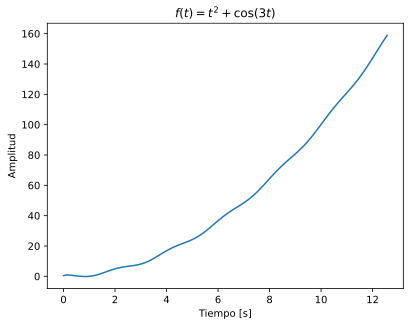

In [47]:
fig, ax = plt.subplots()

ax.plot(tiempos,f_t_);

ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Amplitud")
ax.set_title(r"$f(t)=t^2+\cos(3t)$");

## Evaluación de la función mediante **lambdify**

Una alternativa a la combinación de métodos **subs()** y **evalf()** es la utilización de la función **lambdify()**, la cual nos permite convertir una función simbolica en una función clásica de Python. Esto lo realizamos de la siguiente manera

In [36]:
f_t_ = sp.lambdify(t,f_t,modules="numpy")

Ahora para evaluar nuestra función en el instante de tiempo que deseemos solamente debemos utilizarla como cualquier otra función en Python

In [37]:
f_t_(np.pi/3)

0.09662271123215072

Con esta idea podemos generar la lista con los valores de $f(t)$ para los valores de tiempo

In [41]:
f_t_2 = [f_t_(t_) for t_ in tiempos]

Y ahora graficamos

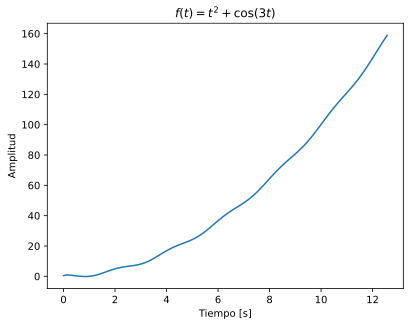

In [42]:
fig, ax = plt.subplots()
ax.plot(tiempos,f_t_2);
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Amplitud")
ax.set_title(r"$f(t)=t^2+\cos(3t)$");

La gran ventaja de **lambdify()** sobre la combinación de métodos **subs()** y **evalf()** es que es un algoritmo aproximadamente 50 veces más rápido que los demás, y esta diferencia en la velocidad de cómputo se hace notoria cuando las funciones simbólicas involucran expresiones complicadas y/o cuando la cantidad de elementos en nuestra lista de tiempos es elevada.